# Grover Seach
## Initalization

<IPython.core.display.Javascript object>


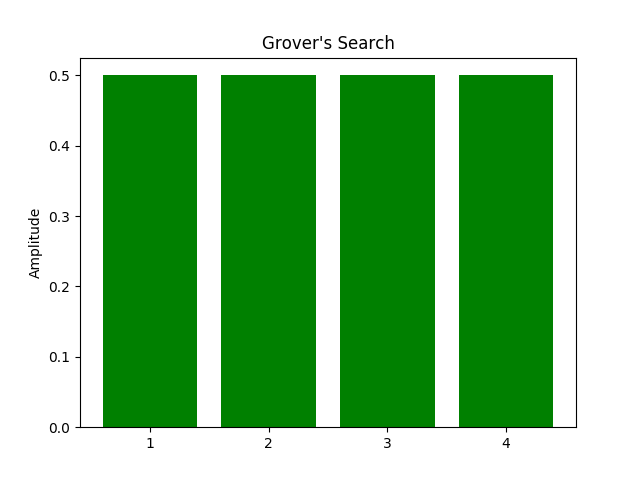

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi
from collections import OrderedDict
from statistics import mean

target = '3'
objects = ('1', '2', '3', '4')
n = len(objects)
amplitude = OrderedDict.fromkeys(objects, 1/sqrt(n))

def plotGraph(amplitude, n):
    y_pos = np.arange(n)
    plt.bar(y_pos, amplitude.values(), align='center', color='g')
    plt.xticks(y_pos, amplitude.keys())
    plt.ylabel('Amplitude')
    plt.title('Grover\'s Search')
 
    plt.show()

plotGraph(amplitude, n)

## Phase Inversion

OrderedDict([('1', 0.5), ('2', 0.5), ('3', -0.5), ('4', 0.5)])


<IPython.core.display.Javascript object>


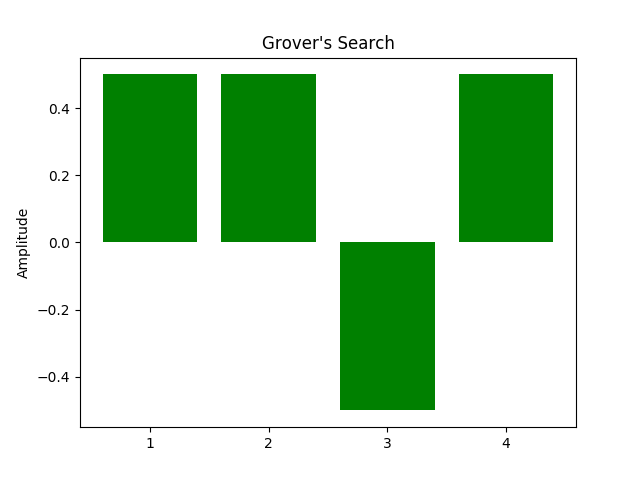

In [74]:
%matplotlib notebook

amplitude[target] = amplitude[target] * -1
print(amplitude)

plotGraph(amplitude, n)

## Inversion about the Mean

Mean = 0.25
OrderedDict([('1', 0.0), ('2', 0.0), ('3', 1.0), ('4', 0.0)])


<IPython.core.display.Javascript object>


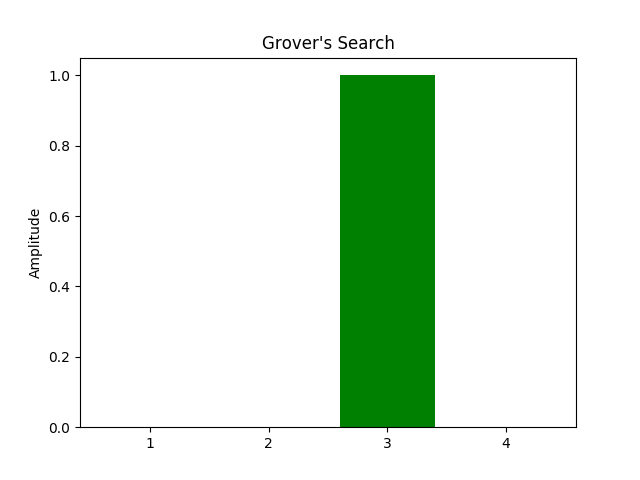

In [75]:
%matplotlib notebook

avg = mean(amplitude.values())
print("Mean = {}".format(avg))
for k, v in amplitude.items():
    if k == target:
        amplitude[k] = (2 * avg) + abs(v)
        continue
    amplitude[k] = v-(2*(v-avg))
print(amplitude)

plotGraph(amplitude, n)

## General Example
Using sha256 as the oracle function

Rounds required: 4


<IPython.core.display.Javascript object>


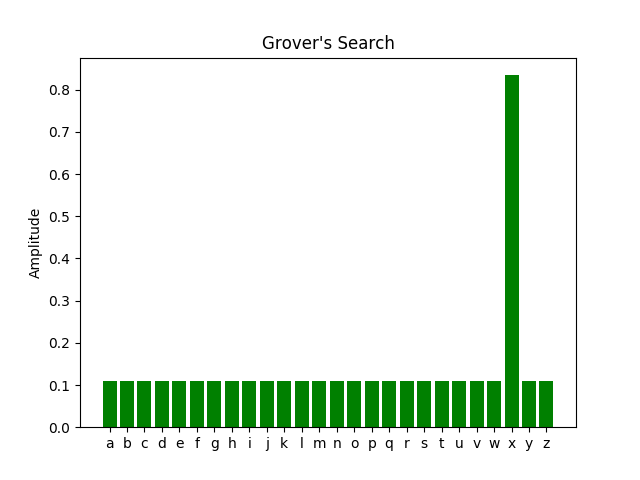

In [13]:
%matplotlib notebook

import hashlib

def oracle(x):
    return hashlib.sha256(bytes(x, 'utf-8')).hexdigest()

def grover(target, objects, n, rounds):
    # initialization
    y_pos = np.arange(n)
    amp = OrderedDict.fromkeys(objects, 1/sqrt(n))

    for i in range(0, rounds, 2):
        # phase inversion
        for k, v in amp.items():
            if oracle(k) == target:
                amp[k] = v * -1

        # inversion abt mean
        avg = mean(amp.values())
        for k, v in amp.items():
            if oracle(k) == target:
                amp[k] = (2 * avg) + abs(v)
                continue
            amp[k] = v-(2*(v-avg))
    return amp

import string
# needle = oracle("f")
needle = "2d711642b726b04401627ca9fbac32f5c8530fb1903cc4db02258717921a4881"
# haystack = string.ascii_letters + string.digits + string.punctuation
haystack = string.ascii_lowercase
n = len(haystack)
rounds = int((pi / 4) * sqrt(n))
print("Rounds required: {}".format(rounds))
plotGraph(grover(needle, haystack, n, rounds), n)